In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
# print(f)

# 확인 이후
plt.rc('font', family='Malgun Gothic')

In [2]:
# 기타(크롤링)을 제외한 로그 데이터 
innerOut_path = '../Data/Preprocessed/innerOut.csv'
innerOut_df_origin = pd.read_csv(innerOut_path)
innerOut_df_origin['Timestamp'] = pd.to_datetime(innerOut_df_origin['Timestamp'])

C:\Users\WESLEYQUEST\AppData\Local\Temp\ipykernel_424\2418091581.py:3: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  innerOut_df_origin = pd.read_csv(innerOut_path)


In [3]:
innerOut_df_origin.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type,month,day,hour
0,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,8,1,14
1,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,8,1,14


In [4]:
# keyword
innerKeyword_path = '../Data/Preprocessed/Keyword/inner_keyword.csv'
innerKeyword_df_origin = pd.read_csv(innerKeyword_path)

out_keyword_path = '../Data/Preprocessed/Keyword/out_keyword.csv'
outKeyword_df_origin = pd.read_csv(out_keyword_path)

outKeyword_df_origin.drop(columns = 'index', inplace = True)
innerKeyword_df_origin.drop(columns = 'index', inplace = True)

outKeyword_df_origin = outKeyword_df_origin.sort_values(by = ['New IP', 'Timestamp'], ascending = True)
innerKeyword_df_origin = innerKeyword_df_origin.sort_values(by = ['New IP', 'Timestamp'], ascending = True)

outKeyword_df_origin['Timestamp'] = pd.to_datetime(outKeyword_df_origin['Timestamp'])
innerKeyword_df_origin['Timestamp'] = pd.to_datetime(innerKeyword_df_origin['Timestamp'])

keyword_df_origin = pd.concat([innerKeyword_df_origin, outKeyword_df_origin], axis = 0, ignore_index = True)
# del innerKeyword_df_origin
# del outKeyword_df_origin

In [5]:
keyword_df_origin.head(2)

,IP,Timestamp,URL,URL Search Word,Referer,Referer Search Word,Referer Source,Device,New IP,User Type,month,day,hour,category
0,106.248.73.18,2022-08-01 16:56:11+09:00,lafent.com/search/search.html?smc=A01&x=0&y=0&...,스튜디오테라,http://www.lafent.com/index.html,NaN,lafent,windows,90,내부,8,1,16,innerWord
1,106.248.73.18,2022-08-01 16:58:28+09:00,lafent.com/search/search.html?kwd=%ED%85%8C%EB...,테라,http://www.lafent.com/search/search.html?smc=A...,스튜디오테라,lafent,windows,90,내부,8,1,16,innerWord


In [9]:
# 내부 접속자 중, 검색 기능 사용자 비중
tmp = innerOut_df_origin[innerOut_df_origin['User Type'] == '내부']['New IP'].nunique()
print('내부 접속자 중, 라펜트 검색 사용자 수:', innerKeyword_df_origin['New IP'].nunique())
print('내부 접속자 중, 라펜트 검색 사용자 비율:', round(innerKeyword_df_origin['New IP'].nunique() / tmp * 100, 2))
print('내부 접속자 중, 라펜트 검색 미사용자 수:', 216959 - 2201)
print('내부 접속자 중, 라펜트 검색 미사용자 비율:', 100 - round(innerKeyword_df_origin['New IP'].nunique() / tmp * 100, 2))

내부 접속자 중, 라펜트 검색 사용자 수: 2201
내부 접속자 중, 라펜트 검색 사용자 비율: 1.01
내부 접속자 중, 라펜트 검색 미사용자 수: 214758
내부 접속자 중, 라펜트 검색 미사용자 비율: 98.99


In [10]:
# 외부 접속자 중, 최초키워드 사용자 비중
tmp = innerOut_df_origin[innerOut_df_origin['User Type'] == '외부']
tmp_value = outKeyword_df_origin.groupby(['New IP'])['category'].apply(lambda x : True if x.nunique() == 2 else False).sum()
print('외부 접속자 중, 최초 키워드 사용자, 내부 검색어 사용자 수:', tmp_value)
# print(outKeyword_df_origin['New IP'].nunique() - tmp_value)
tmp_value = outKeyword_df_origin.groupby(['New IP'])['category'].apply(lambda x : True if (x.nunique() == 1) & (x.unique()[0] == 'firstOutWord') else False).sum()
print('외부 접속자 중, 최초 키워드 사용자, 내부 검색어 미사용자 수:', tmp_value)
tmp_value = outKeyword_df_origin.groupby(['New IP'])['category'].apply(lambda x : True if (x.nunique() == 1) & (x.unique()[0] == 'outWord') else False).sum()
print('외부 접속자 중, 최초 키워드 미사용자, 내부 검색어 사용자 수:', tmp_value)
tmp_value = tmp['New IP'].nunique() - outKeyword_df_origin['New IP'].nunique()
print('외부 접속자 중, 최초 키워드 미사용자, 내부 검색어 미사용자 수:', tmp_value)

외부 접속자 중, 최초 키워드 사용자, 내부 검색어 사용자 수: 206
31709
외부 접속자 중, 최초 키워드 사용자, 내부 검색어 미사용자 수: 29879
외부 접속자 중, 최초 키워드 미사용자, 내부 검색어 사용자 수: 1830
외부 접속자 중, 최초 키워드 미사용자, 내부 검색어 미사용자 수: 139621


In [30]:
# 전체 접속자의 평균 페이지 뷰
print('전체 접속자의 평균 페이지 뷰:', round(innerOut_df_origin.groupby(['New IP'])['URL'].count().mean(), 2))

# 내부 접속자의 평균 페이지 뷰 
tmp = innerOut_df_origin[innerOut_df_origin['User Type'] == '내부']
print('내부 접속자의 평균 페이지 뷰:', round(tmp.groupby(['New IP'])['URL'].count().mean(), 2))
unique_NewIP = innerKeyword_df_origin['New IP'].unique()
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : True if x in unique_NewIP else False)].groupby(['New IP'])['URL'].count().mean(), 2)
print('내부 접속자 중 검색 사용자의 평균 페이지 뷰:', tmp_value)
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : False if x in unique_NewIP else True)].groupby(['New IP'])['URL'].count().mean(), 2)
print('내부 접속자 중 검색 미사용자의 평균 페이지 뷰:', tmp_value)

전체 점속자의 평균 페이지 뷰: 8.19
내부 접속자의 평균 페이지 뷰: 10.12
내부 접속자 중 검색 사용자의 평균 페이지 뷰: 17.78
내부 접속자 중 검색 미사용자의 평균 페이지 뷰: 10.04


In [8]:
# 외부 접속자의 평균 페이지 뷰
tmp = innerOut_df_origin[innerOut_df_origin['User Type'] == '외부']
print('외부 접속자의 평균 페이지 뷰:', round(tmp.groupby(['New IP'])['URL'].count().mean(), 2))

tmpNewIP = outKeyword_df_origin.groupby(['New IP'])['category'].apply(lambda x : x.unique().tolist() == ['outWord']).reset_index()
tmpNewIP = tmpNewIP.loc[(tmpNewIP['category'] == True), 'New IP'].unique().tolist()
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 접속자 중, 최초키워드 미입력 및 검색 사용자의 평균 페이지 뷰:', tmp_value)

tmpNewIP = outKeyword_df_origin.groupby(['New IP'])['category'].apply(lambda x : x.unique().tolist() == ['firstOutWord']).reset_index()
tmpNewIP = tmpNewIP.loc[(tmpNewIP['category'] == True), 'New IP'].unique().tolist()
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 접속자 중, 최초키워드 입력 및 검색 미사용자의 평균 페이지 뷰:', tmp_value)

tmpNewIP = outKeyword_df_origin.groupby(['New IP'])['category'].apply(lambda x : len(x.unique()) == 2).reset_index()
tmpNewIP = tmpNewIP.loc[(tmpNewIP['category'] == True), 'New IP'].unique().tolist()
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 접속자 중, 최초키워드 입력 및 검색 사용자의 평균 페이지 뷰:', tmp_value)

tmpNewIP = outKeyword_df_origin.loc[outKeyword_df_origin['User Type'] == '외부', 'New IP'].values.tolist()
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x not in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 접속자 중, 최초키워드 미입력자 및 검색 미사용자의 평균 페이지 뷰:',tmp_value)

tmpNewIP = outKeyword_df_origin.groupby(['New IP'], group_keys = True)['category'].apply(lambda x : x == 'firstOutWord').reset_index()
tmpNewIP = tmpNewIP.loc[(tmpNewIP['category'] == True), 'New IP'].unique().tolist()
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 입력자 중, 최초키워드 입력자의 평균 페이지 뷰:', tmp_value)

tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x not in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 입력자 중, 최초키워드 미입력자의 평균 페이지 뷰:', tmp_value)

In [38]:
tmp_value = round(tmp.loc[tmp['New IP'].apply(lambda x : x not in tmpNewIP)].groupby(['New IP'])['URL'].count().mean(), 2)
print('외부 입력자 중, 최초키워드 미입력자의 평균 페이지 뷰:', tmp_value)

외부 입력자 중, 최초키워드 미입력자의 평균 페이지 뷰: 6.0


In [57]:
# 최초 키워드 입력자의 채널별 추세
df = outKeyword_df_origin[outKeyword_df_origin['category'] == 'firstOutWord']
df.set_index('Timestamp', inplace = True)
tmp = df.groupby(['Referer Source']).resample('1M')['URL'].count().reset_index().pivot_table(index = 'Timestamp', columns = 'Referer Source', values = 'URL')
tmp['total'] = tmp.sum(axis = 1)
tmp

Referer Source,daum,google,naver,other,total
Timestamp,,,,,
2022-08-31 00:00:00+09:00,1597,5,1456,220,3278
2022-09-30 00:00:00+09:00,1477,12,1432,188,3109
2022-10-31 00:00:00+09:00,1258,8,1320,189,2775
2022-11-30 00:00:00+09:00,1256,13,1108,207,2584
2022-12-31 00:00:00+09:00,1157,9,864,175,2205
2023-01-31 00:00:00+09:00,1197,6,955,171,2329
2023-02-28 00:00:00+09:00,1157,9,1108,158,2432
2023-03-31 00:00:00+09:00,1354,9,1476,198,3037
2023-04-30 00:00:00+09:00,1134,8,1408,156,2706


In [62]:
# 최초 키워드의 월별 키워드 검색 수
df = outKeyword_df_origin[outKeyword_df_origin['category'] == 'firstOutWord']
df.set_index('Timestamp', inplace = True)

tmp = df.groupby(['Referer Search Word']).resample('1M')['URL'].count().sort_values(ascending = False).reset_index()
tmpSearchWord = tmp.groupby(['Referer Search Word'])['URL'].sum().reset_index()
tmpSearchWord = tmpSearchWord.loc[tmpSearchWord['URL'] >= 21, 'Referer Search Word'].unique().tolist()
tmp = tmp.loc[tmp['Referer Search Word'].isin(tmpSearchWord)]
tmp = tmp.pivot_table(index = ['Referer Search Word'], columns = ['Timestamp'], values = ['URL']).fillna(0)
tmp.columns = [str(column[1])[:10] for column in tmp.columns]
tmp['total'] = tmp.sum(axis = 1)
tmp = tmp.reset_index().sort_values(by = ['total', 'Referer Search Word'], ascending = False)
# tmp.to_csv('../Data/Result/최초키워드의 월별 조회수.csv', index = False, encoding = 'utf-8-sig', escapechar = '\\')

# tmp_df = pd.read_csv('../Data/Result/tmp.csv')
# tmp_df = tmp_df.iloc[:, :2]
# tmp_df.rename(columns = {'키워드' : 'Referer Search Word'}, inplace = True)
# tmp = tmp.merge(tmp_df, on = 'Referer Search Word', how = 'left')
# tmp.to_csv('../Data/Result/최초키워드의 월별 조회수.csv', index = False, encoding = 'utf-8-sig', escapechar = '\\')

In [69]:
tmp

,Referer Search Word,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,total,구분
0,잔디보호매트,78.0,71.0,78.0,58.0,35.0,53.0,69.0,91.0,134.0,104.0,94.0,66.0,931.0,조경자재
1,엣지,31.0,26.0,34.0,28.0,16.0,16.0,32.0,46.0,43.0,35.0,33.0,26.0,366.0,조경자재
2,멀티코트,22.0,39.0,33.0,20.0,33.0,25.0,25.0,33.0,34.0,19.0,32.0,17.0,332.0,조경자재
3,벽면녹화,11.0,11.0,24.0,22.0,8.0,20.0,21.0,27.0,19.0,16.0,13.0,9.0,201.0,조경공법
4,엘브엣지,12.0,19.0,15.0,17.0,7.0,13.0,15.0,22.0,24.0,26.0,14.0,13.0,197.0,조경자재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,비탈면 보호공법,1.0,1.0,0.0,1.0,3.0,0.0,4.0,3.0,3.0,2.0,2.0,1.0,21.0,조경공법
79,보강토 옹벽 시공방법,0.0,0.0,0.0,4.0,5.0,1.0,4.0,7.0,0.0,0.0,0.0,0.0,21.0,조경공사
80,백학잔디,2.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,1.0,4.0,1.0,2.0,21.0,조경식물
81,모뉴먼트 제초제 가격,3.0,4.0,0.0,0.0,0.0,3.0,1.0,2.0,3.0,3.0,1.0,1.0,21.0,조경자재


In [72]:
# 검색 사용자 수 그래프
df = keyword_df_origin.loc[keyword_df_origin['category'].isin(['innerWord', 'outWord'])]
df.set_index('Timestamp', inplace = True)

tmp = df.groupby(['category']).resample('1M')['URL'].count().reset_index()

tmp['Timestamp'] = tmp['Timestamp'].astype(str)
tmp['Timestamp'] = tmp['Timestamp'].apply(lambda x : x.split(' ')[0])

tmp = tmp.pivot_table(index = ['Timestamp'], columns = ['category'], values = ['URL']).fillna(0)
tmp.columns = [column[1] for column in tmp.columns]
tmp['전체'] = tmp.sum(axis = 1)

In [73]:
tmp

,innerWord,outWord,전체
Timestamp,,,
2022-08-31,235,223,458
2022-09-30,396,313,709
2022-10-31,357,264,621
2022-11-30,391,387,778
2022-12-31,402,318,720
2023-01-31,370,231,601
2023-02-28,249,284,533
2023-03-31,398,369,767
2023-04-30,291,288,579


In [84]:
# 내부 검색어의 월별 키워드 검색 수
tmp = df.groupby(['URL Search Word']).resample('1M')['URL'].count().reset_index()
tmpSearchWord = tmp.groupby(['URL Search Word'])['URL'].sum().reset_index()
tmpSearchWord = tmpSearchWord.loc[tmpSearchWord['URL'] >= 12, 'URL Search Word'].values.tolist()
tmp = tmp.loc[tmp['URL Search Word'].isin(tmpSearchWord)]
tmp = tmp.pivot_table(index = ['URL Search Word'], columns = ['Timestamp'], values = ['URL']).fillna(0)
tmp.columns = [str(column[1])[:10] for column in tmp.columns]
tmp['total'] = tmp.sum(axis = 1)
tmp = tmp.reset_index().sort_values(by = ['total', 'URL Search Word'], ascending = False)
# tmp.to_csv('../Data/Result/검색 사용자의 키워드 및 월별 검색 수.csv', index = False, encoding = 'utf-8-sig', escapechar = '\\')

# tmp_df = pd.read_csv('../Data/Result/tmp2.csv')
# tmp_df = tmp_df.iloc[:, :2]
# tmp_df.rename(columns = {'키워드' : 'URL Search Word'}, inplace = True)
# tmp = tmp.merge(tmp_df, on = 'URL Search Word', how = 'left')
# tmp.to_csv('../Data/Result/검색 사용자의 키워드 및 월별 검색 수.csv', index = False, encoding = 'utf-8-sig', escapechar = '\\')

In [98]:
# 구분별 외부 접속자 중 최초 키워드 입력자 수 그래프
first_df = pd.read_csv('../Data/Result/최초키워드의 월별 조회수.csv')
first_df = first_df.groupby(['구분']).sum().T
first_df['category'] = 'firstSearchWord'

inner_df = pd.read_csv('../Data/Result/검색 사용자의 키워드 및 월별 검색 수.csv')
inner_df = inner_df.groupby(['구분']).sum().T
inner_df['category'] = 'innerSearchWord'

merge_df = pd.concat([inner_df, first_df], axis = 0)

common_column = []
for column in merge_df.columns:
    if (merge_df[column].isnull().sum() == 0) & (column != 'category'):
        common_column.append(column)

C:\Users\WESLEYQUEST\AppData\Local\Temp\ipykernel_12240\2330138175.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  first_df = first_df.groupby(['구분']).sum().T
C:\Users\WESLEYQUEST\AppData\Local\Temp\ipykernel_12240\2330138175.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inner_df = inner_df.groupby(['구분']).sum().T


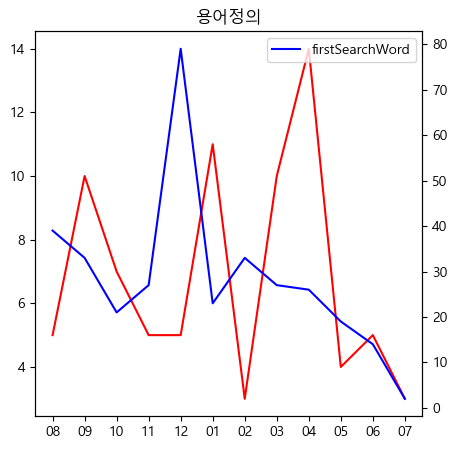

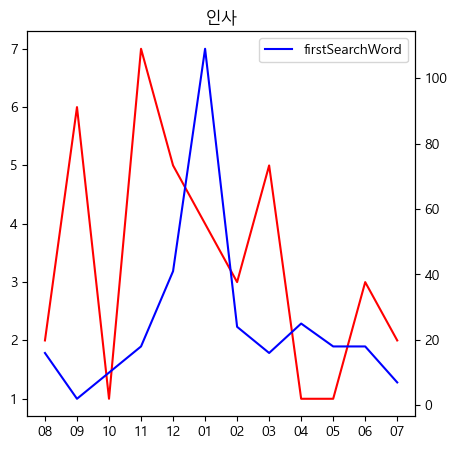

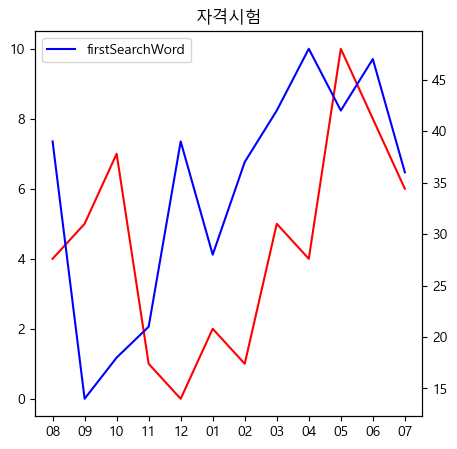

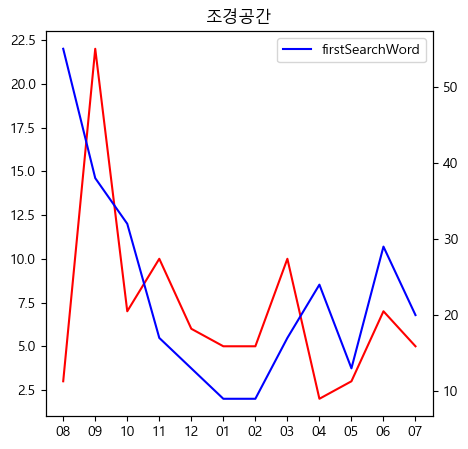

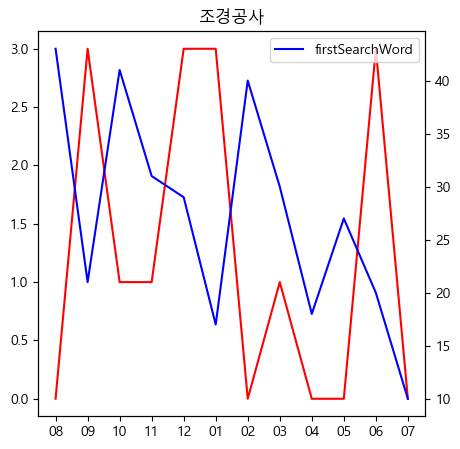

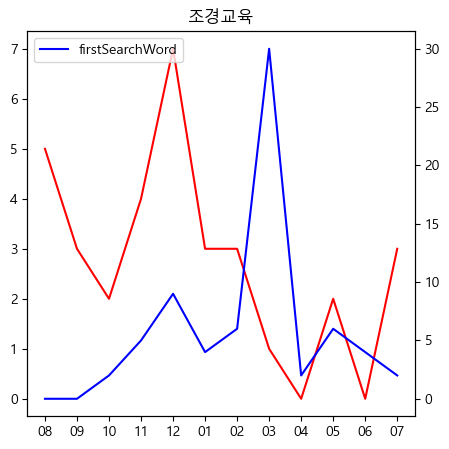

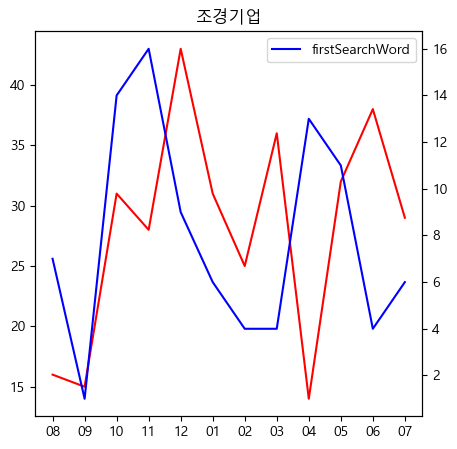

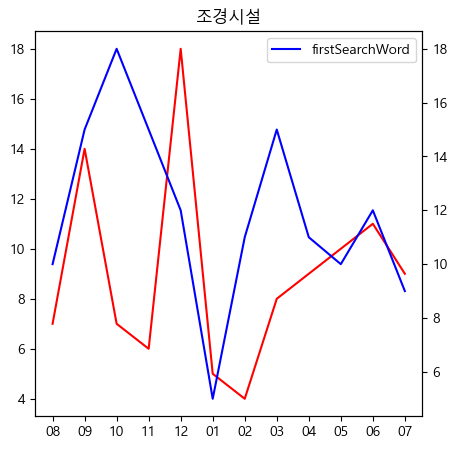

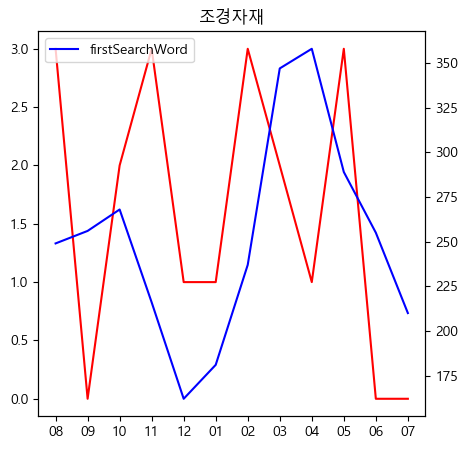

In [149]:
# common_column의 Trend
for column in common_column:
    tmp = merge_df.loc[:, [column, 'category']].reset_index()
    tmp = tmp[tmp['index'] != 'total']
    
    fig, ax = plt.subplots(figsize = (5, 5))
    tmp1 = tmp[tmp['category'] == 'innerSearchWord']
    tmp2 = tmp[tmp['category'] == 'firstSearchWord']
    ax.plot(tmp1['index'].apply(lambda x : x[5:7]), tmp1[column], label = 'innerSearchWord', color = 'red')
    ax_twin = ax.twinx()
    ax_twin.plot(tmp2['index'].apply(lambda x : x[5:7]), tmp2[column], label = 'firstSearchWord', color = 'blue')

    plt.legend()
    plt.title(column)
    fig.savefig(f'../Result/Graph/Keyword/{column}.png')
    

In [179]:
first_tmp = pd.read_csv('../Data/Result/tmp.csv')
inner_tmp = pd.read_csv('../Data/Result/tmp2.csv')

first_tmp = first_tmp.loc[first_tmp['구분'].isin(common_column)]
inner_tmp = inner_tmp.loc[inner_tmp['구분'].isin(common_column)]

first_tmp = first_tmp.groupby(['구분'])['키워드'].apply(lambda x : x.unique().tolist()).reset_index()
inner_tmp = inner_tmp.groupby(['구분'])['키워드'].apply(lambda x : x.unique().tolist()).reset_index()

In [180]:
first_tmp.head(2)

,구분,키워드
0,용어정의,"[쿼바디스 도미네 뜻, 통경축, 쿼바디스 도미네, 저류지란, 마태의 순교]"
1,인사,"[조경기술사 연봉, 산림청 인사발령, lh공사 인사발령, lh공사 인사이동]"


In [194]:
# 구분 및 최초 검색어, 검색 사용자별 평균 페이지 뷰
first_result = {}
inner_result = {}

first_newIP = outKeyword_df_origin.loc[outKeyword_df_origin['category'] == 'firstOutWord']
for i, row in first_tmp.iterrows():
    tmp_newIP = first_newIP.loc[first_newIP['Referer Search Word'].isin(row['키워드']), 'New IP'].values.tolist()
    tmp = round(innerOut_df_origin.loc[innerOut_df_origin['New IP'].isin(tmp_newIP)].groupby(['New IP'])['URL'].count().mean(), 2)
    first_result[row['구분']] = [tmp]
first_result = pd.DataFrame(first_result)
first_result.index = ['최초 검색어']

inner_newIP = keyword_df_origin.loc[keyword_df_origin['category'].isin(['innerWord', 'outWord'])]
for i, row in inner_tmp.iterrows():
    tmp_newIP = inner_newIP.loc[inner_newIP['URL Search Word'].isin(row['키워드']), 'New IP'].values.tolist()
    tmp = round(innerOut_df_origin.loc[innerOut_df_origin['New IP'].isin(tmp_newIP)].groupby(['New IP'])['URL'].count().mean(), 2)
    inner_result[row['구분']] = [tmp]

inner_result = pd.DataFrame(inner_result)
inner_result.index = ['검색 사용자']

first_result = first_result.T.reset_index()
inner_result = inner_result.T.reset_index()

first_result.merge(inner_result, on = 'index', how = 'left')


,index,최초 검색어,검색 사용자
0,용어정의,1.26,27.55
1,인사,1.25,20.73
2,자격시험,1.74,10.46
3,조경공간,2.56,30.04
4,조경공사,3.50,28.16
5,조경교육,1.16,15.88
6,조경기업,6.12,21.25
7,조경시설,8.99,68.58
8,조경자재,4.11,17.39


In [202]:
# 구분 및 최초 검색어, 검색 사용자별 사용자 수
first_df = pd.read_csv('../Data/Result/최초키워드의 월별 조회수.csv')
inner_df = pd.read_csv('../Data/Result/검색 사용자의 키워드 및 월별 검색 수.csv')

first_df = first_df.loc[first_df['구분'].isin(common_column)]
first_df = first_df.groupby(['구분'])['total'].sum().reset_index()
first_df.rename(columns = {'total' : 'first_total'}, inplace = True)

inner_df = inner_df.loc[inner_df['구분'].isin(common_column)]
inner_df = inner_df.groupby(['구분'])['total'].sum().reset_index()
inner_df.rename(columns = {'total' : 'inner_total'}, inplace = True)

result_df = first_df.merge(inner_df, on = '구분', how = 'left')
result_df

,구분,first_total,inner_total
0,용어정의,343.0,82.0
1,인사,304.0,40.0
2,자격시험,411.0,53.0
3,조경공간,276.0,85.0
4,조경공사,327.0,15.0
5,조경교육,70.0,33.0
6,조경기업,95.0,338.0
7,조경시설,143.0,108.0
8,조경자재,3028.0,19.0


In [189]:
first_result = pd.DataFrame(first_result)

In [190]:
first_result

,용어정의,인사,자격시험,조경공간,조경공사,조경교육,조경기업,조경시설,조경자재
0,1.26,1.25,1.74,2.56,3.5,1.16,6.12,8.99,4.11


In [185]:
keyword_df_origin['category'].unique()

array(['innerWord', 'firstOutWord', 'outWord'], dtype=object)

In [184]:
keyword_df_origin

{'용어정의': 1.26,
 '인사': 1.25,
 '자격시험': 1.74,
 '조경공간': 2.56,
 '조경공사': 3.5,
 '조경교육': 1.16,
 '조경기업': 6.12,
 '조경시설': 8.99,
 '조경자재': 4.11}

In [167]:
innerOut_df_origin.groupby(['IP'])['day'].nunique().sort_values(ascending = False)

IP
121.53.83.2                          31
210.220.86.3                         31
210.220.86.254                       31
58.224.48.103                        31
210.220.86.253                       31
                                     ..
173.252.87.21                         1
173.252.87.2                          1
173.252.87.17                         1
173.252.87.15                         1
['96.22.170.134', '66.102.8.123']     1
Name: day, Length: 152266, dtype: int64

In [43]:
# outWithInnerSearch: 외부인: 최초 키워드 없이 방문하고 내부 검색어를 이용한 고객 분석
tmp = outKeyword_df_origin.groupby(['New IP']).apply(lambda x : pd.isnull(x.iloc[0]['Referer Search Word']))
newIp_list = tmp[tmp == True].index.values.tolist()
outWithFirstSearch = outKeyword_df_origin[outKeyword_df_origin['New IP'].isin(newIp_list)]
# outWithFirstSearch = outKeyword_df_origin[(outKeyword_df_origin['New IP'].isin(newIp_list)) & (outKeyword_df_origin['Referer Source'] == 'lafent') & (~outKeyword_df_origin['URL Search Word'].isnull())]

# outWithInnerSearch 고객 수
print(len(newIp_list))

# outWithInnerSearch NewIP별 검색어 수 평균 및 분포



1345


In [48]:
# outWithFirstSearch: 외부인: 최초 키워드로 들어온 사람
tmp = outKeyword_df_origin.groupby(['New IP']).apply(lambda x : pd.notnull(x.iloc[0]['Referer Search Word']))
newIp_list = tmp[tmp == True].index.values.tolist()
# outWithFirstSearch = outKeyword_df_origin[(outKeyword_df_origin['New IP'].isin(newIp_list)) & (outKeyword_df_origin['Referer Source'] != 'lafent') & (~outKeyword_df_origin['URL Search Word'].isnull())]

# outWithFirstSearch 고객 수
print(len(newIp_list))

# outWithFirstSearch NewIP별 검색어 수 평균 및 분포
tmp_df = pd.DataFrame({'IP' : range(1, 24), 
                       'tmp' : [0 for _ in range(1, 24)]}).merge(outWithFirstSearch.groupby(['New IP'])['IP'].count().reset_index().groupby(['IP'])['New IP'].count().reset_index(),
                                                                 on = 'IP',
                                                                 how = 'left')

tmp_df.loc[pd.isnull(tmp_df['New IP']), 'New IP'] = 0
tmp_df.drop(columns = ['tmp'], inplace = True)

# 평균
avg = round(tmp_df.apply(lambda x : x['IP'] * x['New IP'], axis = 1).sum() / len(newIp_list) * 100, 2)
print(avg)

30570
8.18


In [163]:
innerOut_df_origin.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type,month,day,hour
0,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,8,1,14
1,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,8,1,14
